<a href="https://colab.research.google.com/github/Harishma-K-Da/Harishma-K-Da/blob/main/Harishma_Iris_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# prompt: import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# prompt: load and explore dataset

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Convert to pandas DataFrame for easier exploration
df = pd.DataFrame(data=X, columns=iris.feature_names)
df['target'] = y

# Explore the dataset
print(df.head())  # View the first few rows
print(df.describe())  # Get summary statistics
print(df.info())  # Get information about the dataset
print(df['target'].value_counts())  # View the distribution of target classes

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000  

In [9]:
# prompt: split the dataset into test and train

from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)


In [10]:
# prompt: train the model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create a Logistic Regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [11]:
# prompt: make prediction

from sklearn.datasets import load_iris

# ... (Your existing code) ...

# Make a prediction for a new data point
new_data_point = np.array([[5.1, 3.5, 1.4, 0.2]])  # Example new data point
prediction = model.predict(new_data_point)

# Print the predicted class
print("Predicted class:", prediction)

# You can also get the probabilities for each class
probabilities = model.predict_proba(new_data_point)
print("Probabilities for each class:", probabilities)

Predicted class: [0]
Probabilities for each class: [[9.76555666e-01 2.34442849e-02 4.89358781e-08]]


In [12]:
# prompt: evaluate the model

from sklearn.metrics import classification_report, confusion_matrix

# Evaluate the model using classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


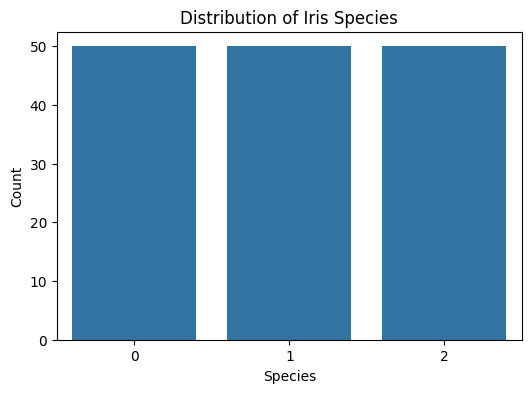

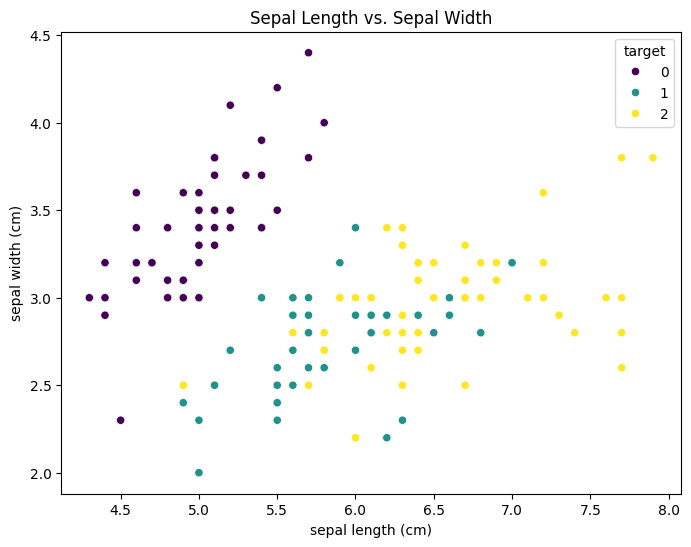

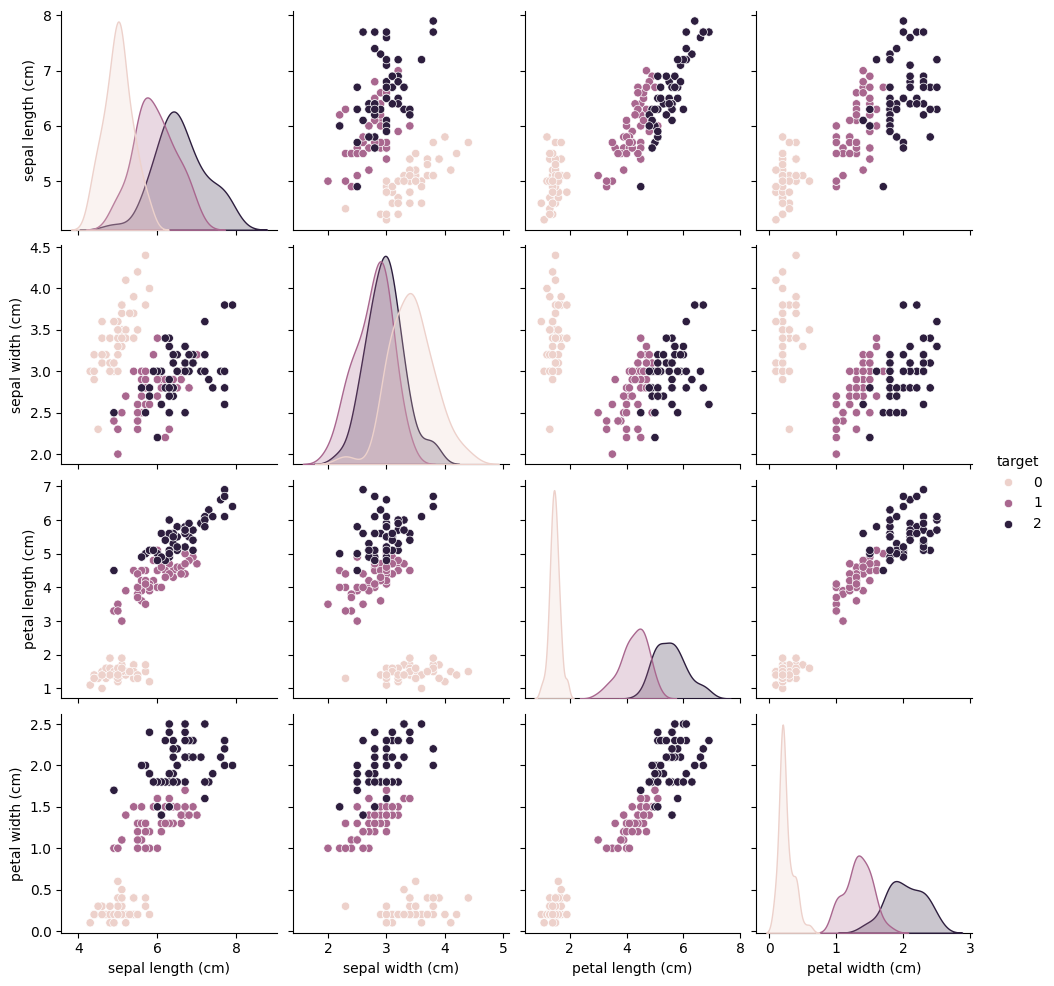

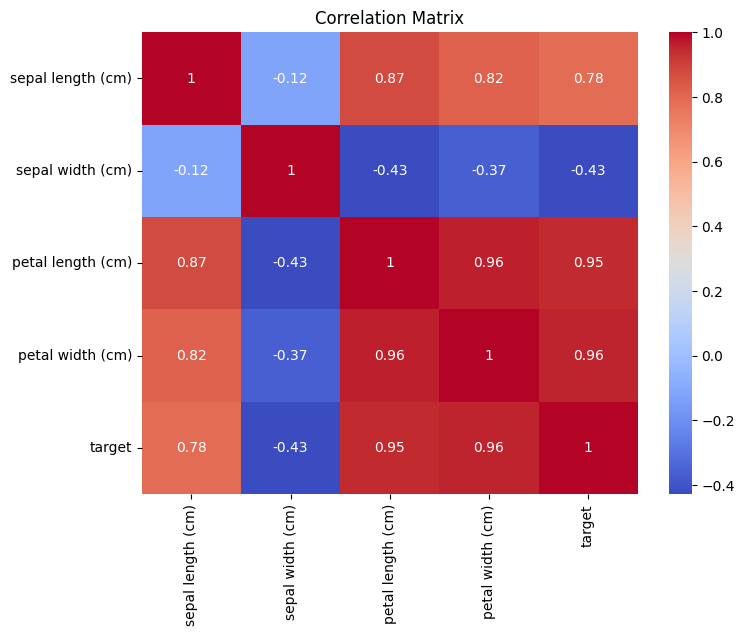

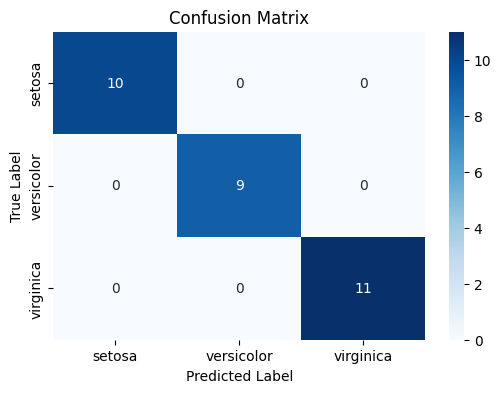

In [13]:
# prompt: visualize the results

# Visualize the distribution of target classes
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title('Distribution of Iris Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()


# Create a scatter plot of sepal length vs. sepal width, colored by target class
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='target', data=df, palette='viridis')
plt.title('Sepal Length vs. Sepal Width')
plt.show()

# Create a pairplot to visualize relationships between all features
sns.pairplot(df, hue='target', diag_kind='kde')
plt.show()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()